# Loopar med `foreach`

*Av Anders Sundell*

I en annan guide gick vi igenom hur man gör loopar med kommandot `forvalues`. Med det kan vi köra en serie kommandon och byta ut ett värde som räknas upp eller ner kontinuerligt.

I den här guiden ska vi prata om ett besläktat kommando: `foreach`. Det är nästan exakt samma sak, men med det kan vi loopa över en lista godtyckliga värden, inklusive textsträngar.

Det är bland annat användbart för att loopa över olika variabler, eller för att till exempel göra en serie analyser eller grafer för ett flertal länder, eller vad det nu kan vara.

## En enkel loop
Principen är alltså att vi tillhandahåller en lista med värden, och så kör Stata en serie kommandon, en runda för varje värde i listan. Och så kan vi stoppa in det aktuella värdet var som helst i serien kommandon.

Den första loopen är den enklast tänkbara: Vi ska göra en lista över några landsnamn, och låta Stata skriva ut landsnamnen. Vi skriver då till exempel `foreach country in "Sweden" "Denmark" "Norway" {}`. Listan består alltså av tre landsnamn, separerade med citationstecknen och mellanslag. Loopen kommer köras tre gånger, och varje gång kommer [macrot](macros_sv.html) "country" att ha olika värden (antingen "Sweden", "Denmark" eller "Norway"). Varje runda loopen körs utför Stata de kommandon som står innanför klammerparenteserna.

Vi använder kommandot `display` för att skriva ut värdet av country.

In [2]:
foreach country in "Sweden" "Denmark" "Norway"{
display "`country'"
}


Sweden
Denmark
Norway


Notera att jag var tvungen att skriva "`country'", dvs sätta citationstecken kring country. Stata kommer annars läsa "display Sweden" och tro att Sweden är någon sorts variabel eller liknande.

Vi kan också göra det med nummer:

In [3]:
foreach number in 5 74 17 12 {
display `number'
}


5
74
17
12


Nu behövde vi inte sätta citationstecken kring number - det fungerar olika med tal och text.

## Loopa över variabelnamn

Vi ska nu prova att upprepa en och samma analys, fast använda en loop för att stoppa in olika variabler i analysen. Låt säga att vi bland världens länder vill se hur korruption, etnisk fragmentering och avstånd från ekvatorn hänger ihop med graden av demokrati, med bivariata regressionsanalyser. Dvs vi ska ha demokrati som beroende variabel, och de tre olika variablerna som oberoende, fast inte samtidigt.
För att slippa skriva i princip samma sak flera gånger använder vi då en loop.

Listan med värden vi anger kommer att vara de tre variabelnamnen. Och inom klammerparenteserna i loopen skriver vi regressionskommandot.

För att det inte ska bli så rörigt så skriver vi `quietly` framför regressionskommandot, så att det inte blir någon output. Istället sparar vi resultaten med estimates store m_`var'. När loopen är slut kan vi sedan använda [esttab](esttab_sv.html) för att visa det viktigaste i resultaten

In [11]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear

foreach var in ti_cpi al_ethnic lp_lat_abst {
quietly reg p_polity2 `var'
estimates store m_`var'
}

esttab m*


(Quality of Government Basic dataset 2018 - Cross-Section)



------------------------------------------------------------
                      (1)             (2)             (3)   
                p_polity2       p_polity2       p_polity2   
------------------------------------------------------------
ti_cpi              0.137***                                
                   (6.15)                                   

al_ethnic                          -5.306**                 
                                  (-2.81)                   

lp_lat_abst                                         9.281** 
                                                   (3.23)   

_cons              -1.644           6.522***        1.810*  
                  (-1.60)          (6.59)          (2.01)   
------------------------------------------------------------
N                     164             159             134   
------------------------------------------------------------
t statistics in par

Vi har fått tre regressionsmodeller, som var och en innehåller en bivariat regressionsanlays, med tre olika oberoende variabler.

Kanske inte jättetidseffektivt i det här fallet, men det blir smidigare och smidigare ju fler variabler man behöver göra en analys på. Ju mer kod vi skulle behöva upprepa, desto smidigare blir det också.

## Loopa över länder som väljs ut i ett dataset
För att illustrera hur smidigt det kan vara ska vi nu ta ett exempel där vi loopar över en lite större mängd kod.

Det vi ska göra är att göra en graf som visar ett lands nivå av arbetslöshet över tid. Vi kommer använda oss av en datamängd där varje observation är ett land-år. I koden kommer vi ange en [if-sats](ifstatements_sv.html), som anger att grafen bara ska göras på de observationer som uppfyller kriteriet att landsnamnet är det som är aktuellt inom loopen.

Vi fixar också till grafen lite, så att den i titeln skriver ut landsnamnet. Därutöver ser vi till att skalan på y-axeln går från 0 till 12, och att färgschemat är s1mono.

Slutligen exporterar vi varje graf till en .png-fil.


(Quality of Government Basic dataset 2018 - Time-Series)


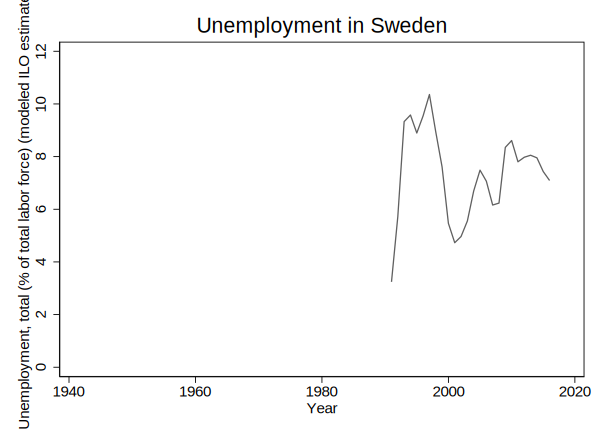



(file unemployment_Sweden.pdf written in PDF format)


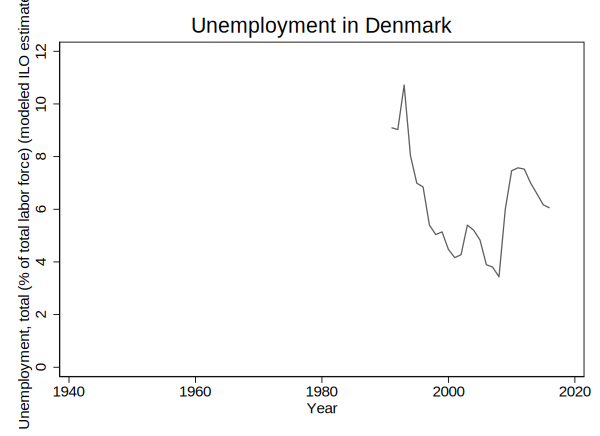


(file unemployment_Denmark.pdf written in PDF format)


In [21]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_ts_jan18.dta", clear

foreach country in "Sweden" "Denmark" {

twoway (line wdi_unempilo year) if cname=="`country'", ///
title("Unemployment in `country'") ylabel(0(2)12) scheme(s1mono)

graph export "unemployment_`country'.pdf", replace

}


Inte så tokigt va? Listan här vara bara två land lång, men det blir såklart riktigt effektivt om man har många länder.

## Avslutning

Precis som med `forvalues` kan vi använda `foreach` på en massa olika sätt. För enklare analyser är det inte särskilt nödvändigt. Men i större projekt, där man ska göra många likartade analyser, eller en mängd omkodningar av variabler på samma sätt, eller exportera en mängd grafer, kan det vara effektivt.

Loopar kan minska risken för slarvfel eftersom man bara behöver skriva koden en gång. Om man istället kopierar ett och samma stycke flera gånger ökar risken att det ska smyga sig in ett fel någonstans.

Kom ihåg att värdena som loopen loopar över sparas i ett macro som man anger själv. Läs guiden till [macron](macros_sv.html) för att få bättre koll på hur de fungerar.